#### carregando e tratando a base

In [9]:
import pandas as pd

df = pd.read_csv("Suicide_Rates_Overview.csv")

df.columns = (
    df.columns.str.lower()
              .str.replace(" ", "_")
              .str.replace("/", "_")
)

df.head()

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country-year,hdi_for_year,_gdp_for_year_($)_,gdp_per_capita_($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796.0,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796.0,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796.0,Boomers


In [11]:
df.rename(columns={
    "country": "pais",
    "year": "ano",
    "sex": "sexo",
    "age": "faixa_etaria",
    "suicides_no": "numero_suicidios",
    "population": "populacao",
    "suicides_100k_pop": "suicidios_por_100k",
    "country-year": "pais_ano",
    "hdi_for_year": "idh_ano",
    "_gdp_for_year_($)_": "pib_ano_usd",
    "gdp_per_capita_($)": "pib_per_capita_usd",
    "generation": "geracao"
}, inplace=True)

df.head()

,pais,ano,sexo,faixa_etaria,numero_suicidios,populacao,suicidios_por_100k,pais_ano,idh_ano,pib_ano_usd,pib_per_capita_usd,geracao
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796.0,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796.0,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796.0,Boomers


In [15]:
# Converter colunas numéricas
df["suicidios_por_100k"] = pd.to_numeric(df["suicidios_por_100k"], errors="coerce")
df["pib_per_capita_usd"] = pd.to_numeric(df["pib_per_capita_usd"], errors="coerce")

# Remover registros sem taxa de suicídio
df = df.dropna(subset=["suicidios_por_100k"])

#### Tendência global de suicídio

##### Insight <br>
As taxas globais de suicídio apresentam crescimento até o início dos anos 2000, seguido por períodos de estabilização e leve queda, possivelmente associados a mudanças sociais e políticas públicas de saúde.

-----------------------------

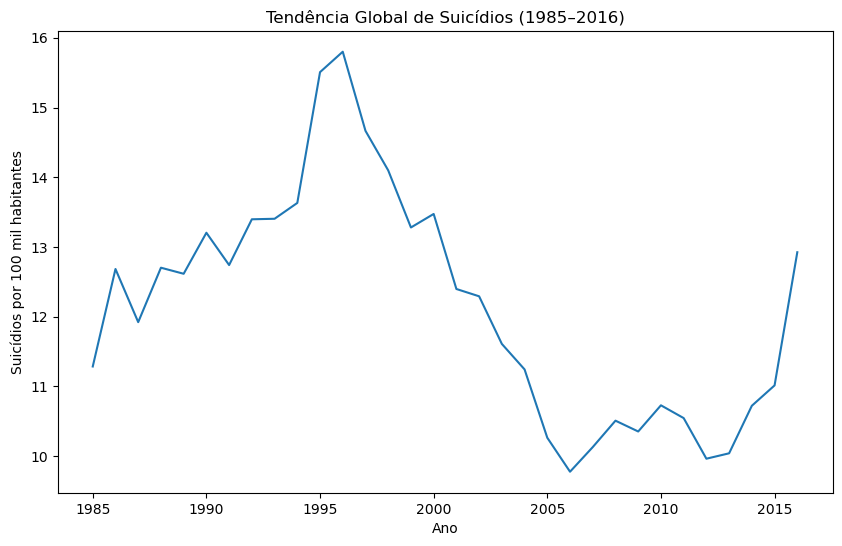

<Figure size 640x480 with 0 Axes>

In [44]:
import matplotlib.pyplot as plt

tendencia_global = (
    df.groupby("ano")["suicidios_por_100k"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(10,6))
plt.plot(tendencia_global["ano"], tendencia_global["suicidios_por_100k"])
plt.title("Tendência Global de Suicídios (1985–2016)")
plt.xlabel("Ano")
plt.ylabel("Suicídios por 100 mil habitantes")
plt.show()

import os
os.makedirs("images", exist_ok=True)

plt.savefig("images/tendencia_global_suicidios.png", dpi=300, bbox_inches="tight")
plt.show()

#### Diferença por gênero

##### Insight <br>

Homens apresentam taxas consistentemente mais elevadas de suicídio em comparação às mulheres ao longo de todo o período analisado, padrão amplamente observado em estudos de saúde pública.

----------------------------------------

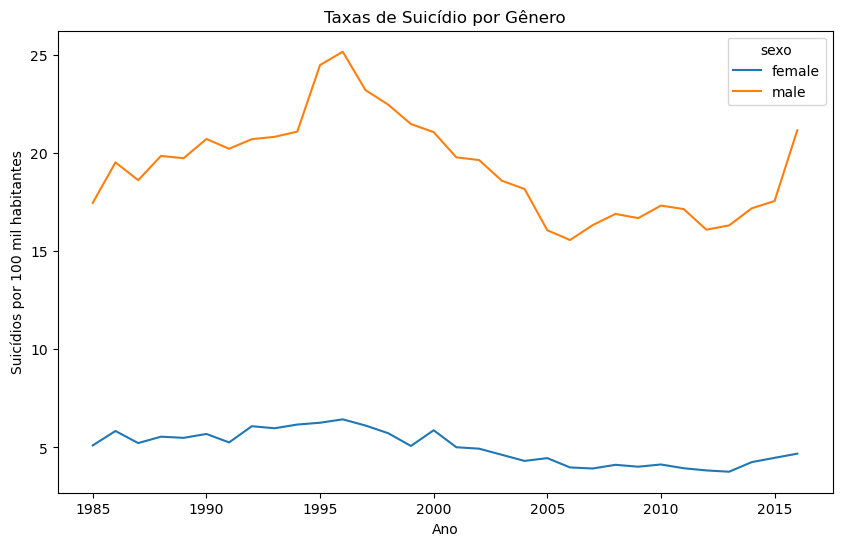

<Figure size 640x480 with 0 Axes>

In [46]:
suicidio_genero = (
    df.groupby(["ano", "sexo"])["suicidios_por_100k"]
      .mean()
      .unstack()
)

suicidio_genero.plot(figsize=(10,6))
plt.title("Taxas de Suicídio por Gênero")
plt.xlabel("Ano")
plt.ylabel("Suicídios por 100 mil habitantes")
plt.show()

plt.savefig("images/suicidios_por_genero.png", dpi=300, bbox_inches="tight")
plt.show()

#### Análise por faixa etária

##### Insight <br>

Faixas etárias mais avançadas apresentam maiores taxas médias de suicídio, indicando maior vulnerabilidade em populações idosas.

--------------------

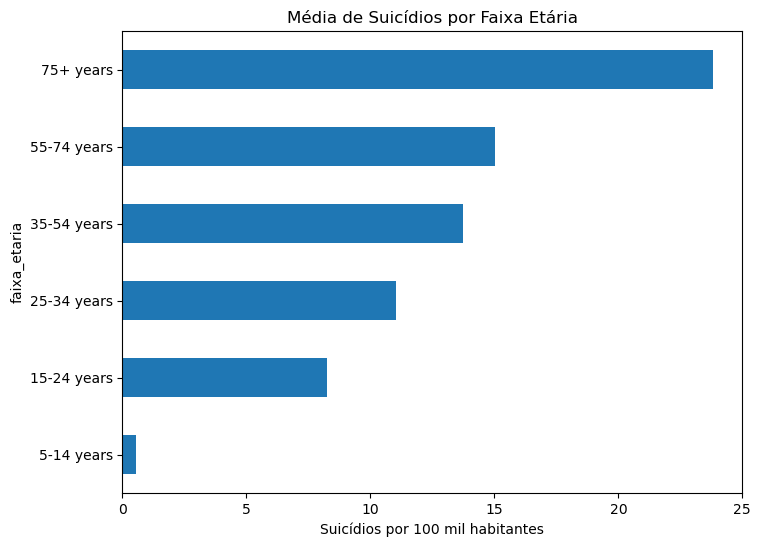

<Figure size 640x480 with 0 Axes>

In [48]:
suicidio_faixa_etaria = (
    df.groupby("faixa_etaria")["suicidios_por_100k"]
      .mean()
      .sort_values()
)

suicidio_faixa_etaria.plot(kind="barh", figsize=(8,6))
plt.title("Média de Suicídios por Faixa Etária")
plt.xlabel("Suicídios por 100 mil habitantes")
plt.show()

plt.savefig("images/media_suicidio_por_faixa_etaria.png", dpi=300, bbox_inches="tight")
plt.show()

#### Relação entre suicídio e PIB per capita

##### Insight <br>

Não é observada uma relação linear forte entre PIB per capita e taxas de suicídio, indicando que fatores econômicos isolados não explicam completamente o fenômeno.

-----------------

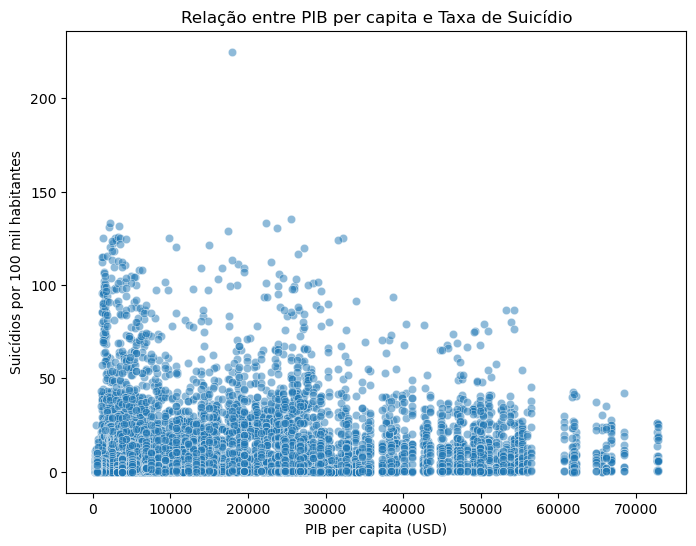

<Figure size 640x480 with 0 Axes>

In [50]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="pib_per_capita_usd",
    y="suicidios_por_100k",
    alpha=0.5
)

plt.title("Relação entre PIB per capita e Taxa de Suicídio")
plt.xlabel("PIB per capita (USD)")
plt.ylabel("Suicídios por 100 mil habitantes")
plt.show()

plt.savefig("images/relacao_entre_pib_e_taxa_de_suicidio.png", dpi=300, bbox_inches="tight")
plt.show()